In [3]:
f = open('Linux_2k.log', 'r')
lines = f.readlines()
f.close()

In [4]:
lines[0]

'Jun 14 15:16:01 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4 \n'

In [107]:
import re

logs = []
for line in lines:
    fields = line.split()[5:]
    logs.append(' '.join(fields))

In [44]:
vocab = {}

import random
low = 0
high = 1

# Python Generate List of Random Numbers Between 0 to 1
floatList = [random.uniform(low, high) for _ in range(257)]

for i in range(0, 257):
    vocab[i] = floatList[i]
    
vocab_size = len(vocab)

inverse_vocab = {index: token for token, index in vocab.items()}
    
lengths = np.array([len(value.replace('\n','').replace('\r','')) for value in logs])
max_length = int(lengths.mean() + lengths.std())

x = [np.frombuffer(bytearray(value, 'utf-8'), np.uint8) for value in logs]
x = pad_sequences(x, maxlen=max_length, padding='post', value=0, truncating='post')

x_train = []
for item in x:
    x_train.append([vocab[i] for i in item])

scaled_x = np.array(x_train, dtype=np.float32)

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(scaled_x)
reduced = pca.transform(scaled_x)

dbscan = DBSCAN(n_jobs=-1, min_samples=5, eps=0.8)
dbscan.fit(scaled_x)

y_labels = dbscan.labels_
y_labels

array([ 0,  1,  0, ..., -1, -1, -1])

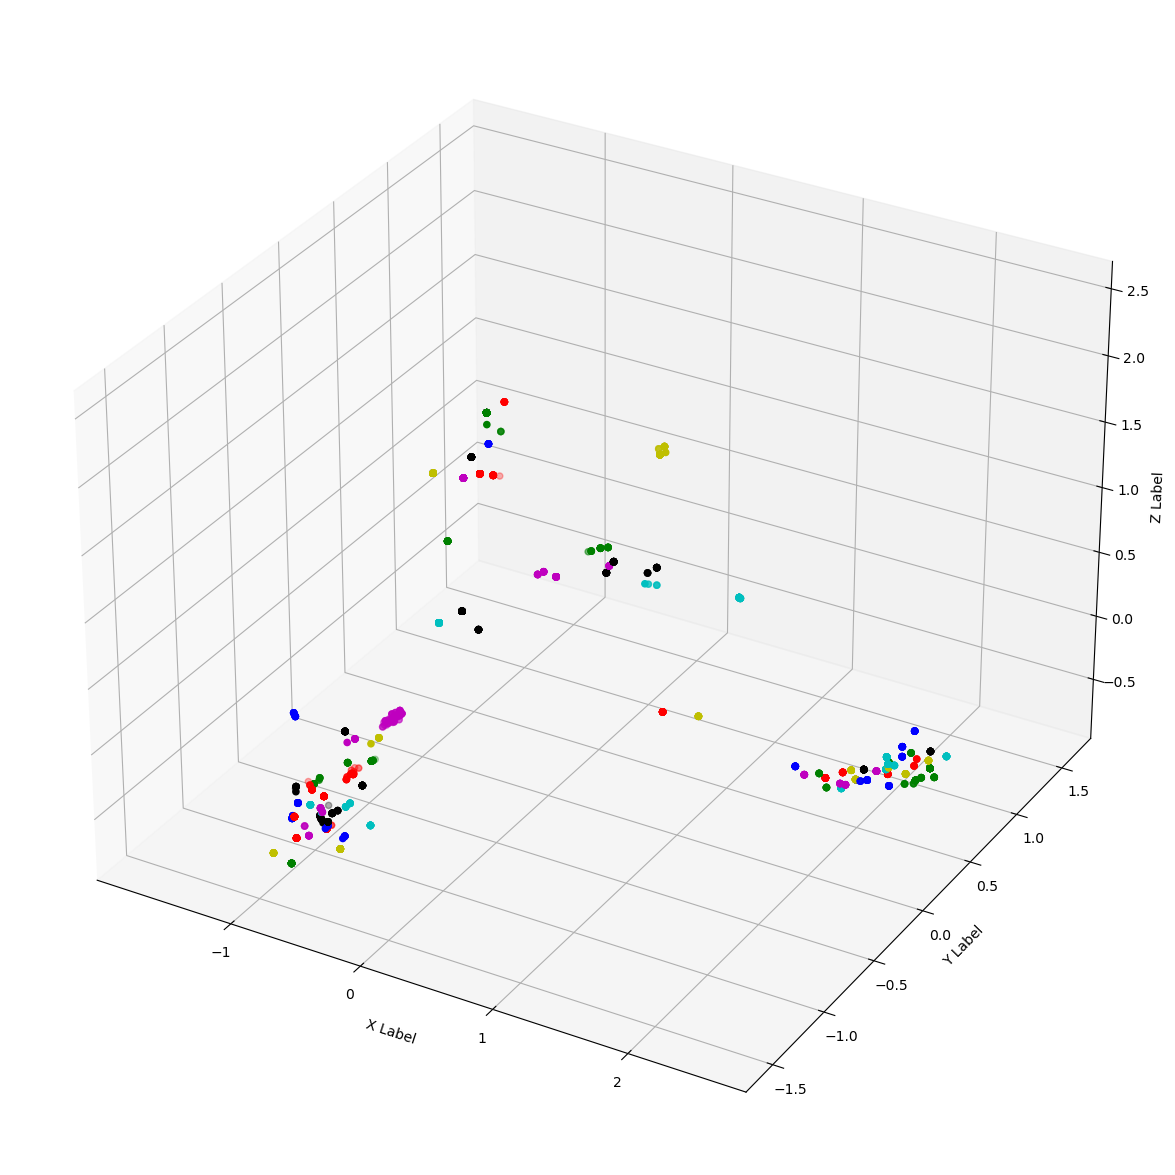

In [78]:
import matplotlib.pyplot as plt

def scatter3d(data, labels):
    clusters = len(np.unique(labels))
    colors = list("rgbcmyk")
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111, projection='3d')
    for cluster in range(clusters):
        ax.scatter(data[labels==cluster, 0], data[labels==cluster, 1], data[labels==cluster, 2], c=colors[cluster%len(colors)])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
scatter3d(reduced, y_labels)

In [100]:
df = pd.DataFrame(logs)
df['cluster'] = y_labels

for i, cluster in enumerate(df['cluster']):
    if cluster == -1:
        print(logs[i])

#for cluster in range(-1, len(np.unique(y_labels))-1):
#    print(f"=====================\nCluster {cluster}\n")
#    print(df.loc[df['cluster']==cluster])

authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=211.46.224.253 user=guest
User unknown timed out after 900 seconds at Sat Jun 18 02:23:10 2005
Received SNMP packet(s) from 67.170.148.126
authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=200.60.37.201
*** info [mice.c(1766)]:
imps2: Auto-detected intellimouse PS/2
session opened for user root by LOGIN(uid=0)
root[2421]: ROOT LOGIN ON tty2
removing device node '/udev/vcsa2'
removing device node '/udev/vcs2'
creating device node '/udev/vcs2'
creating device node '/udev/vcsa2'
removing device node '/udev/vcs2'
removing device node '/udev/vcsa2'
creating device node '/udev/vcs2'
creating device node '/udev/vcsa2'
authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=c9063558.virtua.com.br
authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=c9063558.virtua.com.br
authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=c9063558.virtua.com.br
au